In [1]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nb
from nighres import io

### Load data

In [6]:
g = nb.load('/home/julia/data/gradients/results/gradient0000_highres_allen.nii.gz').get_data()

In [7]:
mesh = io.load_mesh_geometry('/home/julia/data/gradients/atlas/allen_api/brain_mesh.vtk')

/home/julia/workspace/conda/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:2444: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/julia/workspace/conda/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:2447: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


In [58]:
cortex = io.load_mesh_geometry('/home/julia/data/gradients/atlas/allen_api/cortex_mesh.vtk')

(-0.5, 455.5, 319.5, -0.5)

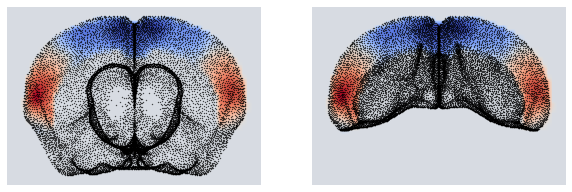

In [76]:
x = 250
fig = plt.figure(figsize=(10,10))
fig.add_subplot(121)
mesh_slice = mesh['points'][(mesh['points'][:,0]-x*25)<1][:,1:]/25
plt.scatter(mesh_slice[:,1], mesh_slice[:,0], s=0.1, color='black');
plt.imshow(g[x, :, :], cmap='coolwarm');
plt.axis('off')
fig.add_subplot(122)
cortex_slice = cortex['points'][(cortex['points'][:,0]-x*25)<1][:,1:]/25
plt.scatter(cortex_slice[:,1], cortex_slice[:,0], s=0.1, color='black');
plt.imshow(g[x, :, :], cmap='coolwarm');
plt.axis('off')

In [77]:
import pandas as pd

In [79]:
mesh['points'][:,:10]

array([[ 7896.56 ,  3384.15 ,   503.781],
       [ 7777.44 ,  3414.98 ,   501.766],
       [ 7903.   ,  3480.7  ,   492.858],
       ...,
       [13185.2  ,  4515.53 ,  7052.17 ],
       [13183.2  ,  4503.4  ,  7098.49 ],
       [13184.1  ,  4499.95 ,  7146.95 ]])

In [80]:
df = pd.read_csv('/home/julia/data/gradients/atlas/allen_api/normals.csv')

In [91]:
normals = np.array(df[['Normals:0', 'Normals:1', 'Normals:2']])

In [94]:
np.save('/home/julia/data/gradients/atlas/allen_api/brain_mesh_normals.npy', normals)

For each vertex, go in the opposite direction of the normal, if you find data (in some distance), sample as long as there is data